In [30]:
#Import Librarys and Data
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

data=pd.read_csv("Analysis.csv")

In [31]:
print(data.head)

<bound method NDFrame.head of     Date  Positives  Negatives  Percent
0      1        544       2413     18.4
1      2        625       1878     25.0
2      3        531       2521     17.4
3      4        311       1260     19.8
4      5        556       2309     19.4
..   ...        ...        ...      ...
59    60        139       2933      4.5
60    61         90       1047      7.9
61    62        257       4662      5.2
62    63        282       4965      5.4
63    64        220       3920      5.3

[64 rows x 4 columns]>


In [32]:
# Gaussian kernel
def kernel(point, xmat, k):
    m,n = np.shape(xmat)
    weights = np.mat(np.eye((m)))
    
    for j in range(m):
        diff = point - X[j]
        weights[j, j] = np.exp(diff * diff.T / (-2.0 * k**2))
    
    return weights

def localWeight(point, xmat, ymat, k):
    wt = kernel(point, xmat, k)
    W = (X.T * (wt*X)).I * (X.T * wt * ymat.T)
    return W

def localWeightRegression(xmat, ymat, k):
    m,n = np.shape(xmat)
    ypred = np.zeros(m)
    
    for i in range(m):
        ypred[i] = xmat[i] * localWeight(xmat[i], xmat, ymat, k)
        
    return ypred

<bound method DataFrame.info of     Date  Positives  Negatives  Percent
0      1        544       2413     18.4
1      2        625       1878     25.0
2      3        531       2521     17.4
3      4        311       1260     19.8
4      5        556       2309     19.4
..   ...        ...        ...      ...
59    60        139       2933      4.5
60    61         90       1047      7.9
61    62        257       4662      5.2
62    63        282       4965      5.4
63    64        220       3920      5.3

[64 rows x 4 columns]>
(64, 2)


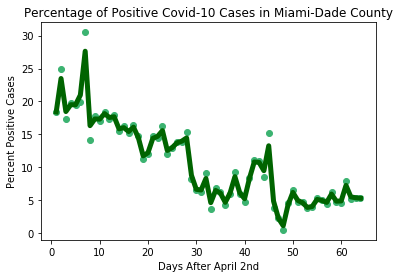

In [63]:
#Percent of Positive Cases Since April 2nd
colA = np.array(data.Date)
colB = np.array(data.Percent)
print(data.info)

mcolA = np.mat(colA)
mcolB = np.mat(colB)

m = np.shape(mcolB)[1]
one = np.ones((1, m), dtype = int)

# horizontal stacking
X = np.hstack((one.T, mcolA.T))
print(X.shape)

ypred = localWeightRegression(X, mcolB, 0.5)

xsort = X.copy()
xsort.sort(axis=0)
plt.scatter(colA, colB, color='mediumseagreen')
plt.plot(xsort[:, 1], ypred[X[:, 1].argsort(0)], color='darkgreen', linewidth=5)
plt.xlabel('Days After April 2nd')
plt.ylabel('Percent Positive Cases')
plt.title('Percentage of Positive Covid-10 Cases in Miami-Dade County')
plt.show()

<bound method DataFrame.info of     Date  Positives  Negatives  Percent
0      1        544       2413     18.4
1      2        625       1878     25.0
2      3        531       2521     17.4
3      4        311       1260     19.8
4      5        556       2309     19.4
..   ...        ...        ...      ...
59    60        139       2933      4.5
60    61         90       1047      7.9
61    62        257       4662      5.2
62    63        282       4965      5.4
63    64        220       3920      5.3

[64 rows x 4 columns]>
(64, 2)


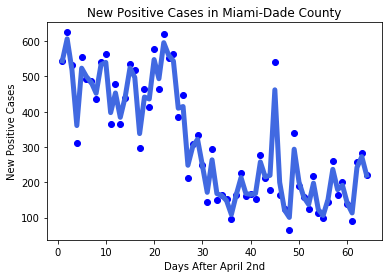

In [54]:
#Positive Cases Since April 2nd
colA = np.array(data.Date)
colB = np.array(data.Positives)
print(data.info)

mcolA = np.mat(colA)
mcolB = np.mat(colB)

m = np.shape(mcolB)[1]
one = np.ones((1, m), dtype = int)

# horizontal stacking
X = np.hstack((one.T, mcolA.T))
print(X.shape)

ypred = localWeightRegression(X, mcolB, 0.5)

xsort = X.copy()
xsort.sort(axis=0)
plt.scatter(colA, colB, color='blue')
plt.plot(xsort[:, 1], ypred[X[:, 1].argsort(0)], color='royalblue', linewidth=5)
plt.xlabel('Days After April 2nd')
plt.ylabel('New Positive Cases')
plt.title('New Positive Cases in Miami-Dade County')
plt.show()

<bound method DataFrame.info of     Date  Positives  Negatives  Percent
0      1        544       2413     18.4
1      2        625       1878     25.0
2      3        531       2521     17.4
3      4        311       1260     19.8
4      5        556       2309     19.4
..   ...        ...        ...      ...
59    60        139       2933      4.5
60    61         90       1047      7.9
61    62        257       4662      5.2
62    63        282       4965      5.4
63    64        220       3920      5.3

[64 rows x 4 columns]>
(64, 2)


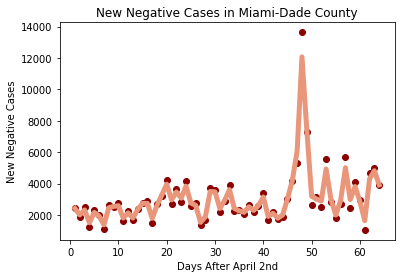

In [64]:
#Negative Cases Since April 2nd
colA = np.array(data.Date)
colB = np.array(data.Negatives)
print(data.info)

mcolA = np.mat(colA)
mcolB = np.mat(colB)

m = np.shape(mcolB)[1]
one = np.ones((1, m), dtype = int)

# horizontal stacking
X = np.hstack((one.T, mcolA.T))
print(X.shape)

ypred = localWeightRegression(X, mcolB, 0.5)

xsort = X.copy()
xsort.sort(axis=0)
plt.scatter(colA, colB, color='darkred')
plt.plot(xsort[:, 1], ypred[X[:, 1].argsort(0)], color='darksalmon', linewidth=5)
plt.xlabel('Days After April 2nd')
plt.ylabel('New Negative Cases')
plt.title('New Negative Cases in Miami-Dade County')
plt.show()

    Date   Positives    Negatives   Percent
0    NaN         NaN          NaN       NaN
1    NaN         NaN          NaN       NaN
2    NaN         NaN          NaN       NaN
3    NaN         NaN          NaN       NaN
4    NaN         NaN          NaN       NaN
..   ...         ...          ...       ...
59  57.0  160.142857  3211.000000  4.871429
60  58.0  156.857143  2957.857143  5.442857
61  59.0  179.285714  3368.714286  5.428571
62  60.0  199.142857  3693.285714  5.485714
63  61.0  193.571429  3442.857143  5.614286

[64 rows x 4 columns]


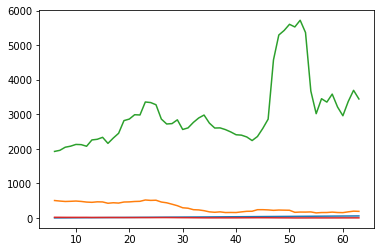

In [82]:
new=data.rolling(window=7).mean()
print(new)
plot(new)